# Question 3 & 5

### 3. Working with Autoregressive Modeling [2 Marks]

- **[2 marks]**  Consider the [Daily Temperatures dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv) from Australia. This is a dataset for a forecasting task. That is, given temperatures up to date (or period) T, design a forecasting (autoregressive) model to predict the temperature on date T+1. You can refer to [link 1](https://www.turing.com/kb/guide-to-autoregressive-models), [link 2](https://otexts.com/fpp2/AR.html) for more information on autoregressive models. Use linear regression as your autoregressive model. Plot the fit of your predictions vs the true values and report the RMSE obtained.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'])

print("Dataset shape:", data.shape)
print(data.head())
print(data.tail())

Dataset shape: (3650, 2)
        Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8
           Date  Temp
3645 1990-12-27  14.0
3646 1990-12-28  13.6
3647 1990-12-29  13.5
3648 1990-12-30  15.7
3649 1990-12-31  13.0


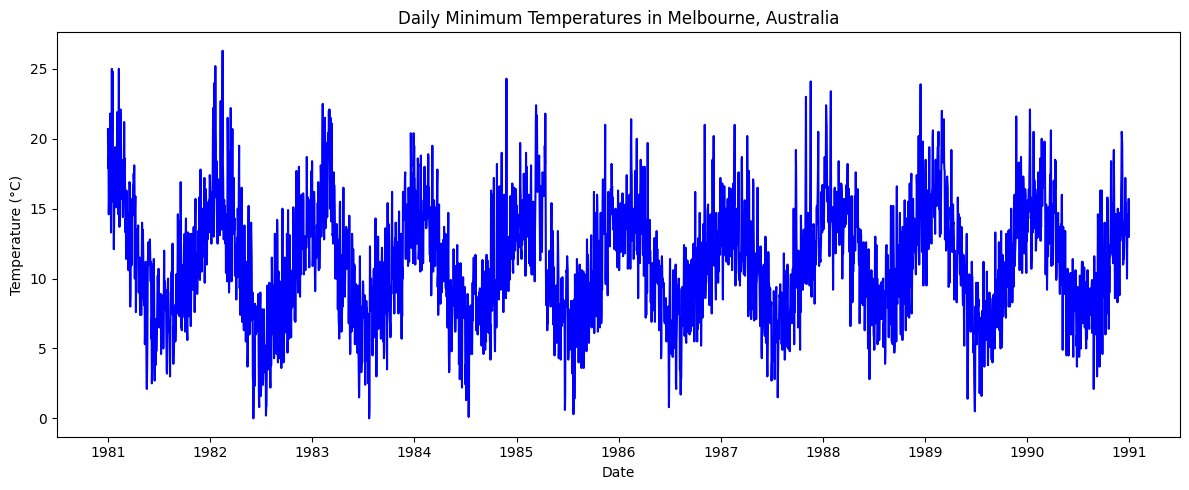

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(data['Date'], data['Temp'], color='blue')
plt.title('Daily Minimum Temperatures in Melbourne, Australia')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

In [ ]:
# Create autoregressive lag features
n_lags = 2  # use last 2 days as predictors (AR(2))
for i in range(1, n_lags + 1):
    data[f'lag_{i}'] = data['Temp'].shift(i)

data = data.dropna()

In [ ]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [ ]:
X_train = train[[f'lag_{i}' for i in range(1, n_lags + 1)]]
y_train = train['Temp']
X_test = test[[f'lag_{i}' for i in range(1, n_lags + 1)]]
y_test = test['Temp']

In [ ]:
#Xt = C + ϕ1Xt-1 + ϕ2Xt-2 +  ϵt
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.3f}")


Root Mean Squared Error (RMSE): 2.369


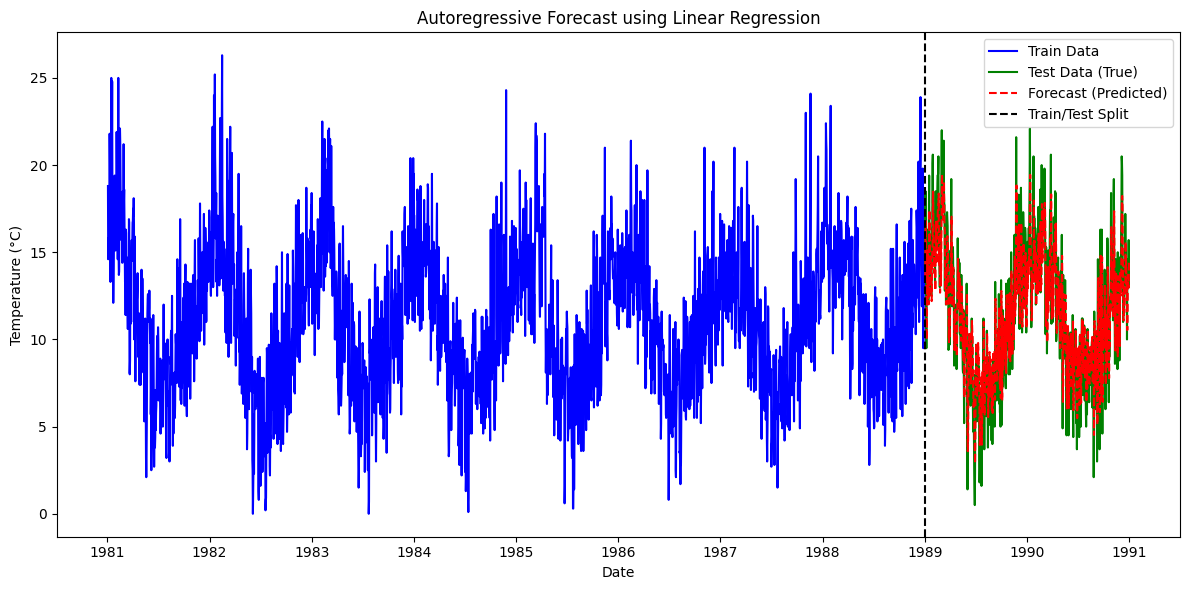

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train['Date'], y_train, label='Train Data', color='blue')
plt.plot(test['Date'], y_test, label='Test Data (True)', color='green')
plt.plot(test['Date'], y_pred, label='Forecast (Predicted)', color='red', linestyle='--')

plt.axvline(x=test['Date'].iloc[0], color='black', linestyle='--', label='Train/Test Split')
plt.title('Autoregressive Forecast using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()

### 5. Logistic Regression in PyTorch [2 marks]

Implement logistic regression from scratch in PyTorch with an interface similar to scikit-learn’s `LogisticRegression`. Your implementation should support the following:

```python
class LogisticTorch:
    def __init__(self, lr=0.01, epochs=1000):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

    def predict_proba(self, X):
        pass
```

Use the following dataset:

```python
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
```

* Train your ```LogisticTorch``` classifier on this dataset.
* Compare the performance with ```sklearn.linear_model.LogisticRegression```.
* Plot the decision boundary for both models.
* Plot the loss curve during training.
* Report accuracy on the dataset for both models.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as SklearnLogReg
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn

In [ ]:
class LogisticTorch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_fn = nn.BCELoss()
        self.losses = []

    def fit(self, X, y):
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

        n_samples, n_features = X.shape

        self.weights = torch.zeros((n_features, 1), requires_grad=True)
        self.bias = torch.zeros(1, requires_grad=True)

        optimizer = torch.optim.SGD([self.weights, self.bias], lr=self.lr)

        for _ in range(self.epochs):
            linear_model = X @ self.weights + self.bias
            y_pred = torch.sigmoid(linear_model)
            loss = self.loss_fn(y_pred, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            self.losses.append(loss.item())

        return self

    def predict_proba(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        with torch.no_grad():
            linear_model = X @ self.weights + self.bias
            probs = torch.sigmoid(linear_model)
        return torch.cat((1 - probs, probs), dim=1).numpy()

    def predict(self, X):
        probs = self.predict_proba(X)[:, 1]  # P(y=1)
        return (probs >= 0.5).astype(int)


In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, Y = make_moons(n_samples=200, noise=0.2, random_state=42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

clf= LogisticTorch()

In [ ]:
clf.fit(X_train, Y_train)
#preds=clf.predict(X_test)

sklearn_clf = SklearnLogReg()
sklearn_clf.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
y_pred_torch = clf.predict(X_test)
y_pred_sklearn = sklearn_clf.predict(X_test)

#acc_torch = accuracy_score(Y_test, y_pred_torch)
acc_torch = (y_pred_torch == Y_test).sum() / len(Y_test)
acc_sklearn = accuracy_score(Y_test, y_pred_sklearn)

print(f"PyTorch Logistic Regression Accuracy: {acc_torch:.3f}")
print(f"Sklearn Logistic Regression Accuracy: {acc_sklearn:.3f}")

PyTorch Logistic Regression Accuracy: 0.800
Sklearn Logistic Regression Accuracy: 0.850


In [ ]:
probs = clf.predict_proba(X_test)
print("Predicted probabilities (first 5 samples):")
print(probs[:5])

Predicted probabilities (first 5 samples):
[[0.89729446 0.10270555]
 [0.8139502  0.18604985]
 [0.8675761  0.13242386]
 [0.67164814 0.32835189]
 [0.747058   0.25294203]]


LogisticTorch
Accuracy : 0.800
Precision: 0.762
Recall   : 0.842
F1 Score : 0.800

Sklearn LogisticRegression
Accuracy : 0.850
Precision: 0.810
Recall   : 0.895
F1 Score : 0.850



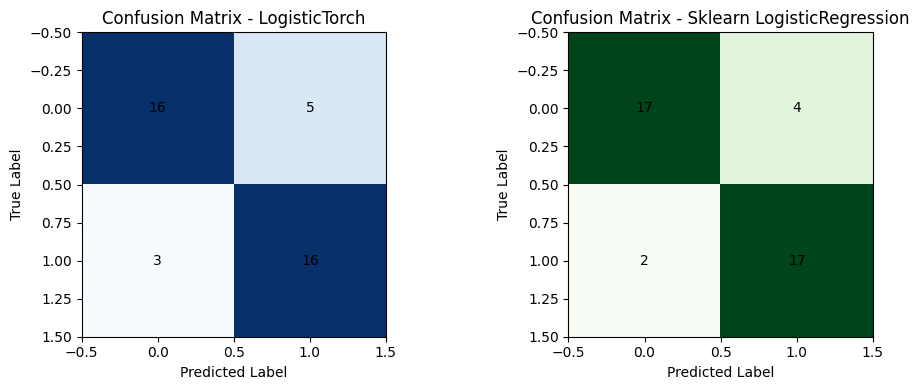

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(Y_true, Y_pred, model_name):
    acc = accuracy_score(Y_true, Y_pred)
    prec = precision_score(Y_true, Y_pred)
    rec = recall_score(Y_true, Y_pred)
    f1 = f1_score(Y_true, Y_pred)

    print(f"{model_name}")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1 Score : {f1:.3f}")
    print()
    return acc, prec, rec, f1

# Evaluate both models
evaluate_model(Y_test, y_pred_torch, "LogisticTorch")
evaluate_model(Y_test, y_pred_sklearn, "Sklearn LogisticRegression")

cm_torch = confusion_matrix(Y_test, y_pred_torch)
cm_sklearn = confusion_matrix(Y_test, y_pred_sklearn)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# LogisticTorch Confusion Matrix
axes[0].imshow(cm_torch, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title("Confusion Matrix - LogisticTorch")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")


for i in range(cm_torch.shape[0]):
    for j in range(cm_torch.shape[1]):
        axes[0].text(j, i, cm_torch[i, j], ha="center", va="center", color="black")

# Sklearn Logistic Regression Confusion Matrix
axes[1].imshow(cm_sklearn, interpolation='nearest', cmap=plt.cm.Greens)
axes[1].set_title("Confusion Matrix - Sklearn LogisticRegression")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

for i in range(cm_sklearn.shape[0]):
    for j in range(cm_sklearn.shape[1]):
        axes[1].text(j, i, cm_sklearn[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()


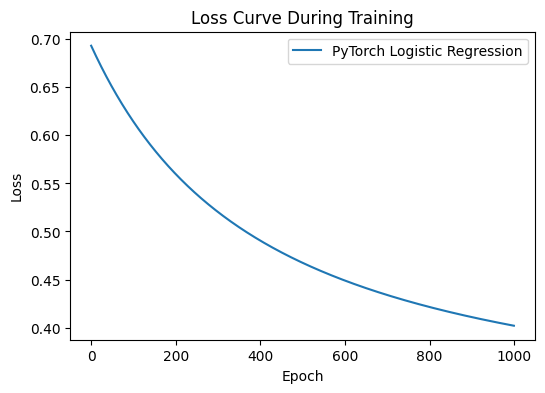

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(clf.losses, label='PyTorch Logistic Regression')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve During Training')
plt.legend()
plt.show()

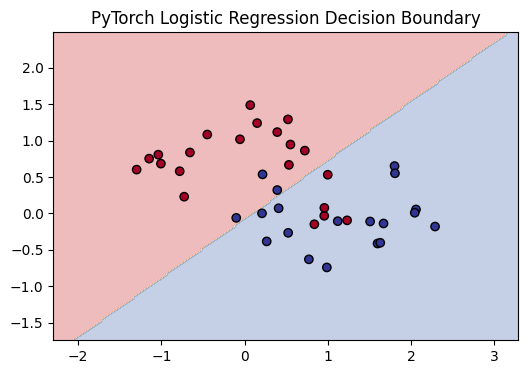

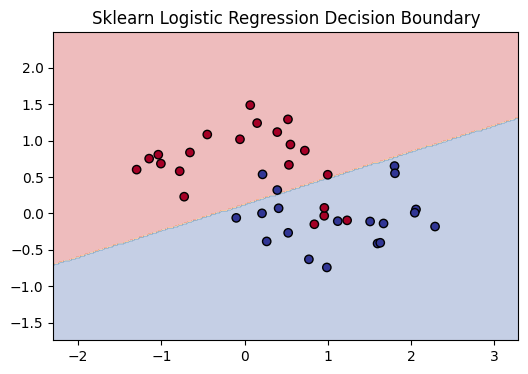

In [ ]:
def plot_decision_boundary(clf, X, y, title, is_torch=False):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]

    if is_torch:
        Z = clf.predict(grid)
    else:
        Z = clf.predict(grid)

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6,4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.show()

plot_decision_boundary(clf, X_test, Y_test, "PyTorch Logistic Regression Decision Boundary", is_torch=True)
plot_decision_boundary(sklearn_clf, X_test, Y_test, "Sklearn Logistic Regression Decision Boundary", is_torch=False)